<a href="https://colab.research.google.com/github/2303A52450/Generative-AI-batch39/blob/main/2450_gen_ai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEPLOYEMENT OF ANN MODELS FOR REAL-TIME AIR QUALITY PREDICTION IN MOBILE APPLICATIONS.

In [2]:
pip install pandas scikit-learn deap matplotlib openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 893.8116 - mae: 29.7602 - val_loss: 860.3067 - val_mae: 29.1154
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 815.2676 - mae: 28.4476 - val_loss: 752.9475 - val_mae: 27.2022
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 697.7962 - mae: 26.2546 - val_loss: 599.3616 - val_mae: 24.1737
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 545.3984 - mae: 23.0745 - val_loss: 414.3387 - val_mae: 19.8278
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 346.0670 - mae: 18.0673 - val_loss: 234.8678 - val_mae: 14.4788
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 168.8924 - mae: 11.7494 - val_loss: 118.0255 - val_mae: 9.4073
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 78.3295 - mae: 7.4058 - val_loss: 69.4535 - val_mae: 6.6456
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.9933 - mae: 5.3182 - val_loss: 50.6154 - val_mae: 5.4614
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━


📊 Evaluation Metrics:
MAE  : 2.54
RMSE : 3.33
R²   : -0.06

✅ Model saved as 'air_quality_ann_model.h5'


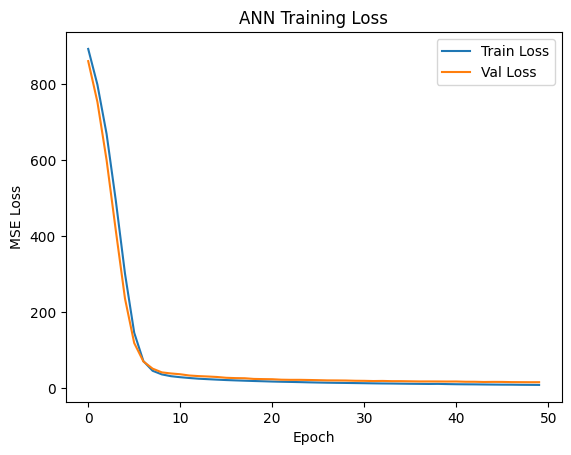

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Step 1: Load dataset
file_path = "Data_Air Pollutant (1).xlsx"
df = pd.read_excel("/content/Data_Air Pollutant (1).xlsx")

# Step 2: Preprocessing
df = df.dropna()
X = df.drop(columns=['From Date', 'To Date', df.columns[-1]])  # Drop date columns + target
y = df[df.columns[-1]]  # Last column as target

# Keep only numeric data
X = X.select_dtypes(include=[np.number])

# Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Build ANN model
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X.shape[1], activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 6: Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Step 7: Evaluate model
y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluation Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")

# Step 8: Save model for deployment
model.save("air_quality_ann_model.h5")
print("\n✅ Model saved as 'air_quality_ann_model.h5'")

# Optional: Loss visualization
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("ANN Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()